# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load Raw Data

In [2]:
employee_2021 = pd.read_csv('data/employee-earnings-report-2021.csv', encoding='latin1')
employee_2022 = pd.read_csv('data/employee-earnings-report-2022.csv')
employee_2023 = pd.read_csv('data/employee-earnings-report-2023.csv')

In [3]:
employee_2021.rename(columns={"QUINN_EDUCATION_INCENTIVE": "QUINN_EDUCATION"}, inplace=True)
display(employee_2021)

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_GROSS,POSTAL
0,"Beckers,Richard",Boston Police Department,Police Officer,NaN,NaN,"1,264,843.63",NaN,NaN,NaN,NaN,"1,264,843.63",02119
1,"McGowan,Jacqueline M.",Boston Police Department,Police Officer,NaN,NaN,"1,252,990.81",NaN,NaN,NaN,NaN,"1,252,990.81",02129
2,"Harris,Shawn N",Boston Police Department,Police Offc Comm Serv Offc 3$8,"69,772.10",NaN,"212,739.48","82,300.87","30,939.24","12,144.00","25,178.06","433,073.75",02130
3,"Washington,Walter",Boston Police Department,Police Officer,"100,963.38",NaN,"211,900.28","67,849.66",NaN,"9,016.00","10,096.55","399,825.87",02368
4,"Mosley Jr.,Curtis",Boston Police Department,Police Offc Comm Serv Offc 3$8,"109,858.02",NaN,"192,097.54","75,938.65",NaN,"19,550.00",NaN,"397,444.21",02301
...,...,...,...,...,...,...,...,...,...,...,...,...
22547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
employee_2022.rename(columns={"TOTAL_ GROSS": "TOTAL_GROSS"}, inplace=True)
display(employee_2022)

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_GROSS,POSTAL
0,"Gavin,Donna M.",Boston Police Department,Police Lieutenant (Det),"53,226.90",NaN,"1,045,845.44",463.52,NaN,NaN,"12,812.39","1,112,348.25",02186
1,"Cassellius,Brenda",Superintendent,Superintendent,"179,109.61",NaN,"417,839.83",NaN,NaN,NaN,NaN,"596,949.44",55419
2,"Dempsey,John",Boston Fire Department,Commissioner (BFD),"133,653.78",NaN,"312,752.53",NaN,NaN,NaN,NaN,"446,406.31",02152
3,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),"145,775.26",NaN,"13,932.92","196,515.25",NaN,"11,880.00","29,155.26","397,258.69",02052
4,"Smith,Sean P",Boston Police Department,Police Lieutenant,"142,535.62",NaN,"18,827.45","142,692.38",NaN,"46,365.00","35,633.88","386,054.33",02186
...,...,...,...,...,...,...,...,...,...,...,...,...
23199,"wheeler,Stephen clifford",Boston Cntr - Youth & Families,Lifeguard I,42.01,NaN,NaN,NaN,NaN,NaN,NaN,42.01,02129
23200,"Harris,Gloria",BPS Office Of Budget Mgmt,Attendant,24.23,NaN,NaN,NaN,NaN,NaN,NaN,24.23,02136
23201,"Jackson,Wanita Tina",Boston Police Department,School Traffic Supv,23.68,NaN,NaN,NaN,NaN,NaN,NaN,23.68,02119
23202,"Paul,Desmond",BPS Substitute Teachers/Nurs,Substitute Teacher HE,21.28,NaN,NaN,NaN,NaN,NaN,NaN,21.28,02119


In [5]:
employee_2023.drop(columns=['_id'], inplace=True)
employee_2023.rename(columns={"TOTAL GROSS": "TOTAL_GROSS"}, inplace=True)
display(employee_2023)

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_GROSS,POSTAL
0,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),145775.26,NaN,6053.17,221579.41,NaN,23862.0,29155.26,426425.10,02052
1,"Hosein,Haseeb",Boston Police Department,Police Captain/DDC,162823.73,NaN,165669.88,34154.37,NaN,5472.0,40706.02,408826.00,02186
2,"Conway,Kendra J",Boston Police Department,Police Officer,359942.30,NaN,48651.28,NaN,NaN,NaN,NaN,408593.58,02465
3,"Smith,Sean P",Boston Police Department,Police Lieutenant,142535.62,NaN,20368.37,152031.33,NaN,51646.0,35633.88,402215.20,02186
4,"Danilecki,John H",Boston Police Department,Police Captain,162326.64,NaN,24504.13,96954.98,NaN,61512.0,40581.57,385879.32,02559
...,...,...,...,...,...,...,...,...,...,...,...,...
25807,"Colon,Markenson",Transportation,Cab Monitor,NaN,1.94,NaN,NaN,NaN,NaN,NaN,1.94,02121
25808,"Harris,Gloria",Budget,Attendant,NaN,0.86,NaN,NaN,NaN,NaN,NaN,0.86,02136
25809,"Wallace,Emma Fierro",BPS Substitute Teachers/Nurs,Substitute Teacher,NaN,0.73,NaN,NaN,NaN,NaN,NaN,0.73,02131
25810,"Kramer,Joseph M",BPS Substitute Teachers/Nurs,Substitute Teacher,NaN,0.46,NaN,NaN,NaN,NaN,NaN,0.46,01845


# Combine and Clean Data

In [6]:
# List of DataFrames to concatenate
employee_2021_2023 = [employee_2021, employee_2022, employee_2023]

# Concatenate DataFrames vertically and reset the index
df = pd.concat(employee_2021_2023, axis=0, ignore_index=True)
df.drop(columns=['NAME', 'POSTAL'], inplace=True)

columns_to_convert = [
    'REGULAR',
    'RETRO',
    'OTHER',
    'OVERTIME',
    'INJURED',
    'DETAIL',
    'QUINN_EDUCATION',
    'TOTAL_GROSS'
]

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[columns_to_convert] = df[columns_to_convert].fillna(0)
df[columns_to_convert] = df[columns_to_convert].clip(lower=0)

df = df[(df['REGULAR'] >= 28000) | (df['TOTAL_GROSS'] >= 28000)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19346 entries, 45756 to 65101
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DEPARTMENT_NAME  19346 non-null  object 
 1   TITLE            19346 non-null  object 
 2   REGULAR          19346 non-null  float64
 3   RETRO            19346 non-null  float64
 4   OTHER            19346 non-null  float64
 5   OVERTIME         19346 non-null  float64
 6   INJURED          19346 non-null  float64
 7   DETAIL           19346 non-null  float64
 8   QUINN_EDUCATION  19346 non-null  float64
 9   TOTAL_GROSS      19346 non-null  float64
dtypes: float64(8), object(2)
memory usage: 1.6+ MB


In [7]:
df['DEPARTMENT_NAME'].unique()

array(['Boston Police Department', "Superintendent's Office", 'Strategy',
       'Boston Fire Department', 'Inspectional Services Dept',
       'Public Works Department', 'Holmes Elementary', 'Boston Latin',
       'School Support', 'Facilities Management', 'Boston Public Library',
       'Kennedy Academy Health Careers', 'Family & Community Advancement',
       'Chief Academic Officer', 'Chief of Staff',
       'Dpt of Innovation & Technology', 'Traffic Division', 'Eliot K-8',
       "Mayor's Office", 'East Boston High', 'Taylor Elementary',
       'Parks Department', 'New Mission High', 'Gardner Pilot Academy',
       'Murphy K-8', 'Curley K-8', 'Madison Park Tech Vocational',
       'Human Capital', 'Planning & Design', 'High School Renewal',
       'Quincy Elementary', 'Tynan Elementary', 'Student Support',
       'Treasury-Treasury Division', 'Finance', 'Brighton High',
       'Boston Retirement System', 'Election Division',
       'Chittick Elementary', 'TechBoston Academy',
    

In [8]:
# List of keywords to identify 'Education' departments
education_keywords = [
    'School',
    'K-8',
    'K-12',
    'K0-2',
    'Ed',
    'BPS',
    'Elementary',
    'High',
    'Academy',
    '3-8',
    'College',
    'Education'
    'Student',
    'Learn',
    'Learning',
    'Vocational',
    "Superintendent's Office",
    'Chief Academic Officer',
    'Student Support',
    'Boston Latin',
    'BCLA-McCormack',
    'Quincy Upper',
    'Haley Pilot',
    'BTU Pilot',
    'Horace Mann',
    'EEC',
    'Carter',
    'West Zone ELC',
    'Alighieri Montessori',
    'Charter'
]

# Escape keywords to handle any special regex characters
escaped_keywords = [re.escape(keyword) for keyword in education_keywords]

# Create the regex pattern
pattern = '|'.join(escaped_keywords)

mask = df['DEPARTMENT_NAME'].str.contains(pattern, case=False, regex=True, na=False)
df.loc[mask, 'DEPARTMENT_NAME'] = 'Education'
df['DEPARTMENT_NAME'].unique()

array(['Boston Police Department', 'Education', 'Strategy',
       'Boston Fire Department', 'Inspectional Services Dept',
       'Public Works Department', 'Facilities Management',
       'Boston Public Library', 'Family & Community Advancement',
       'Chief of Staff', 'Dpt of Innovation & Technology',
       'Traffic Division', "Mayor's Office", 'Parks Department',
       'Human Capital', 'Planning & Design', 'Treasury-Treasury Division',
       'Finance', 'Boston Retirement System', 'Election Division',
       'Capital Planning', 'Office of People Operations',
       'Behavioral Health Services', 'Law Department',
       'Health & Human Servs', 'Office of Housing',
       'Planning & Engineering', 'Equity', 'Early Childhood',
       'Office of Streets', 'Operations', 'Emergency Management',
       'Off of Eco Opp & Incl', 'Health Services', 'Labor Relations',
       'Health & Wellness', 'Auditing Department', 'Safety Services',
       'Cemetery Division', 'Environment Department',

# Basic Analysis

In [9]:
# Group by 'DEPARTMENT_NAME'
education_df = df[df['DEPARTMENT_NAME'] == 'Education']# Get descriptive statistics for the specified columns
education_stats = education_df[['REGULAR', 'OVERTIME', 'TOTAL_GROSS']].describe()
print("Descriptive Statistics for Education Department:")
print(education_stats)

Descriptive Statistics for Education Department:
             REGULAR      OVERTIME    TOTAL_GROSS
count    9686.000000   9686.000000    9686.000000
mean    91283.048100     41.405597   99144.676254
std     36631.649152    664.891399   38745.348557
min         0.000000      0.000000   28027.240000
25%     57364.230000      0.000000   62999.440000
50%     96737.360000      0.000000  104734.780000
75%    122704.547500      0.000000  131650.040000
max    303461.480000  42153.180000  382095.710000


In [10]:
police_df = df[df['DEPARTMENT_NAME'] == 'Boston Police Department']# Get descriptive statistics for the specified columns
police_stats = police_df[['REGULAR', 'OVERTIME', 'TOTAL_GROSS']].describe()
print("Descriptive Statistics for Police Department:")
print(police_stats)

Descriptive Statistics for Police Department:
             REGULAR       OVERTIME    TOTAL_GROSS
count    2727.000000    2727.000000    2727.000000
mean    86624.167363   32439.968874  151446.793297
std     35567.227409   30850.637011   61790.947969
min         0.000000       0.000000   28426.250000
25%     69179.750000    6300.145000  112833.120000
50%     92047.860000   26209.140000  149304.640000
75%    106226.720000   49159.100000  185476.515000
max    359942.300000  221579.410000  426425.100000


In [11]:
mayor_df = df[df['DEPARTMENT_NAME'] == "Mayor's Office"]
mayor_stats = mayor_df[['REGULAR', 'OVERTIME', 'TOTAL_GROSS']].describe()
print("Descriptive Statistics for Mayor's Office:")
print(police_stats)

Descriptive Statistics for Mayor's Office:
             REGULAR       OVERTIME    TOTAL_GROSS
count    2727.000000    2727.000000    2727.000000
mean    86624.167363   32439.968874  151446.793297
std     35567.227409   30850.637011   61790.947969
min         0.000000       0.000000   28426.250000
25%     69179.750000    6300.145000  112833.120000
50%     92047.860000   26209.140000  149304.640000
75%    106226.720000   49159.100000  185476.515000
max    359942.300000  221579.410000  426425.100000


In [12]:
fire_df = df[df['DEPARTMENT_NAME'] == "Boston Fire Department"]
fire_stats = fire_df[['REGULAR', 'OVERTIME', 'TOTAL_GROSS']].describe()
print("Descriptive Statistics for Fire Department:")
print(police_stats)

Descriptive Statistics for Fire Department:
             REGULAR       OVERTIME    TOTAL_GROSS
count    2727.000000    2727.000000    2727.000000
mean    86624.167363   32439.968874  151446.793297
std     35567.227409   30850.637011   61790.947969
min         0.000000       0.000000   28426.250000
25%     69179.750000    6300.145000  112833.120000
50%     92047.860000   26209.140000  149304.640000
75%    106226.720000   49159.100000  185476.515000
max    359942.300000  221579.410000  426425.100000


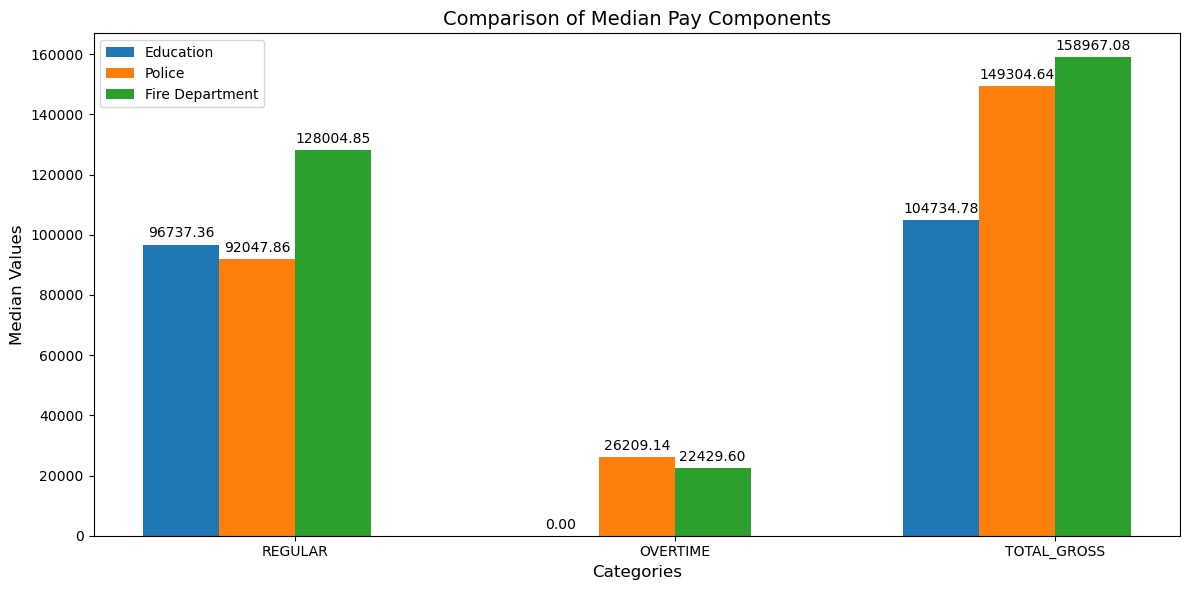

In [13]:
# Extract 'median' (50th percentile) values from the descriptive statistics
education_median = education_stats.loc['50%', ['REGULAR', 'OVERTIME', 'TOTAL_GROSS']]
police_median = police_stats.loc['50%', ['REGULAR', 'OVERTIME', 'TOTAL_GROSS']]
fire_median = fire_stats.loc['50%', ['REGULAR', 'OVERTIME', 'TOTAL_GROSS']]

# Convert to numeric for plotting (if necessary)
education_median = education_median.astype(float)
police_median = police_median.astype(float)
fire_median = fire_median.astype(float)

# Categories for x-axis
categories = education_median.index

# Set up bar positions
x = np.arange(len(categories))  # x locations for the groups
width = 0.2  # Reduced width to accommodate four bars

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each department
bars1 = ax.bar(x - 1.5 * width, education_median, width, label='Education')
bars2 = ax.bar(x - 0.5 * width, police_median, width, label='Police')
bars3 = ax.bar(x + 0.5 * width, fire_median, width, label='Fire Department')

# Add labels, title, and legend
ax.set_xlabel('Categories', fontsize=12)
ax.set_ylabel('Median Values', fontsize=12)
ax.set_title('Comparison of Median Pay Components', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add value labels to bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text position slightly above bar
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Show the plot
plt.tight_layout()
plt.show()


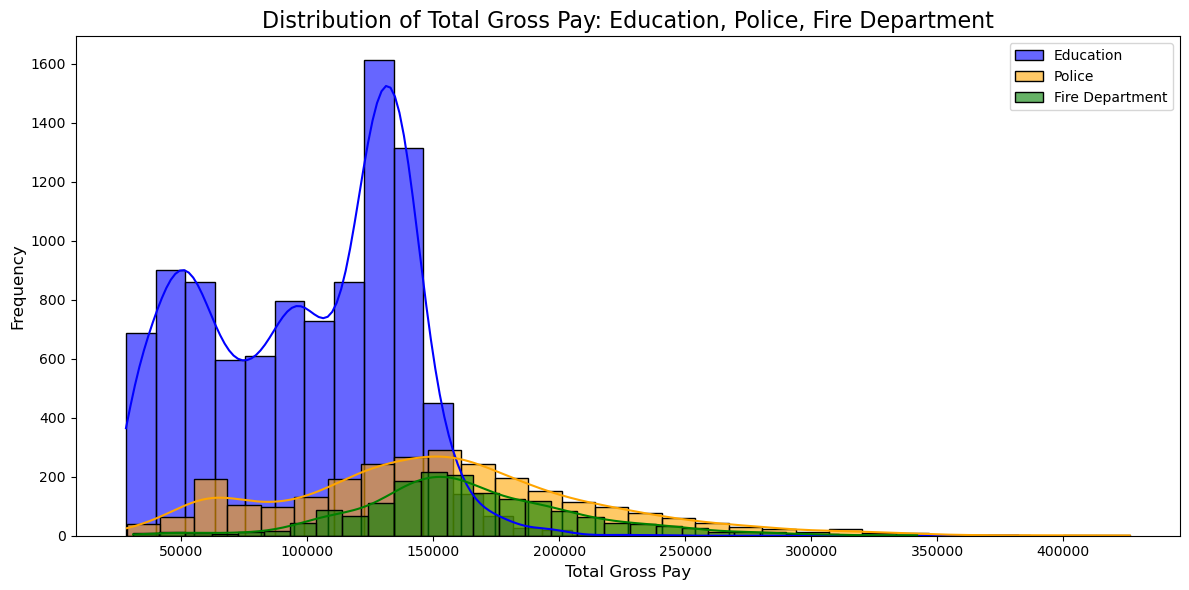

In [14]:
# Filter data for Education, Police, and Fire Department
education_total_gross = education_df['TOTAL_GROSS']
police_total_gross = police_df['TOTAL_GROSS']
fire_total_gross = fire_df['TOTAL_GROSS']

# Plot histograms using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(education_total_gross, bins=30, color='blue', kde=True, label='Education', alpha=0.6)
sns.histplot(police_total_gross, bins=30, color='orange', kde=True, label='Police', alpha=0.6)
sns.histplot(fire_total_gross, bins=30, color='green', kde=True, label='Fire Department', alpha=0.6)

# Add title and labels
plt.title('Distribution of Total Gross Pay: Education, Police, Fire Department', fontsize=16)
plt.xlabel('Total Gross Pay', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
# Group by 'DEPARTMENT_NAME' and calculate the median regular pay
median_regular_by_department = df.groupby('DEPARTMENT_NAME')['REGULAR'].median()

# Find the department with the highest median regular pay
highest_median_regular_department = median_regular_by_department.idxmax()
highest_median_regular_value = median_regular_by_department.max()

print(f"The department with the highest median regular pay is '{highest_median_regular_department}' with a median pay of {highest_median_regular_value:.2f}.")

The department with the highest median regular pay is 'Office of People Operations' with a median pay of 135790.37.


In [16]:
# Group by 'DEPARTMENT_NAME' and calculate the median overtime pay
median_overtime_by_department = df.groupby('DEPARTMENT_NAME')['OVERTIME'].median()

# Find the department with the highest median overtime pay
highest_median_department = median_overtime_by_department.idxmax()
highest_median_value = median_overtime_by_department.max()

print(f"The department with the highest median overtime pay is '{highest_median_department}' with a median pay of {highest_median_value:.2f}.")

The department with the highest median overtime pay is 'Boston Police Department' with a median pay of 26209.14.


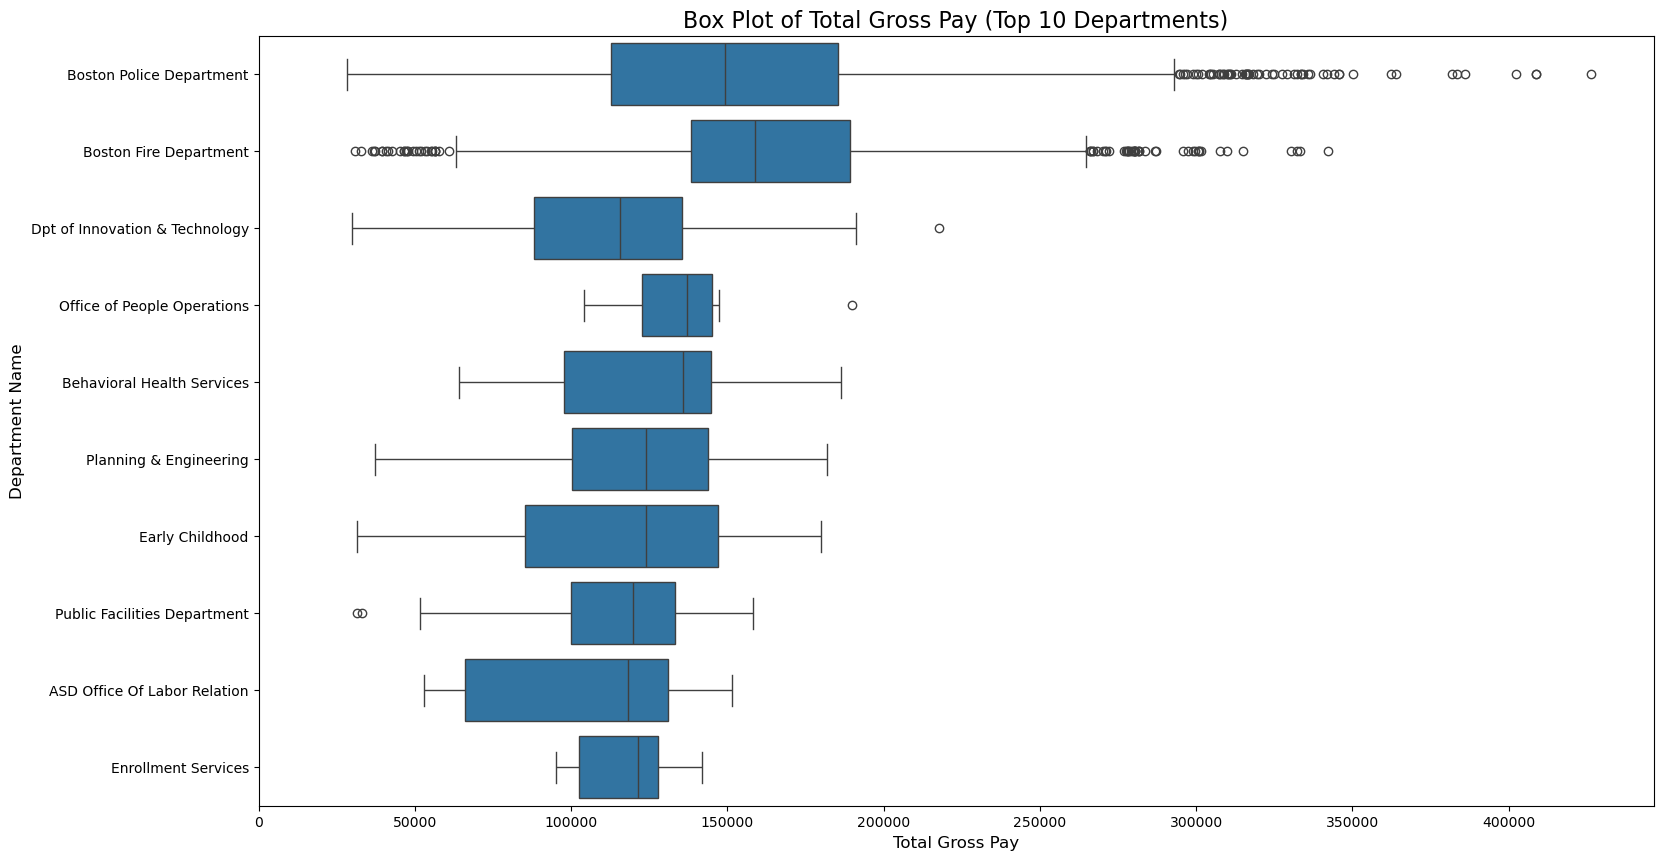

In [17]:
# Select top 15 departments by median TOTAL_GROSS
top_departments = df.groupby('DEPARTMENT_NAME')['TOTAL_GROSS'].median().nlargest(10).index

# Filter the DataFrame
filtered_df = df[df['DEPARTMENT_NAME'].isin(top_departments)]

# Create the box plot
plt.figure(figsize=(18, 10))  # Larger figure size
sns.boxplot(
    data=filtered_df, 
    x='TOTAL_GROSS', 
    y='DEPARTMENT_NAME', 
    orient='h', 
    showfliers=True
)

# Add title and labels
plt.title('Box Plot of Total Gross Pay (Top 10 Departments)', fontsize=16)
plt.xlabel('Total Gross Pay', fontsize=12)
plt.ylabel('Department Name', fontsize=12)

plt.xlim(left=0)

# Adjust tick label font size
plt.tick_params(axis='y', labelsize=10)

# Show the plot
plt.show()

In [19]:
department_counts = filtered_df['DEPARTMENT_NAME'].value_counts()
department_counts

DEPARTMENT_NAME
Boston Police Department          2727
Boston Fire Department            1705
Dpt of Innovation & Technology     135
Public Facilities Department        81
Planning & Engineering              60
Early Childhood                     50
Behavioral Health Services          23
ASD Office Of Labor Relation        11
Enrollment Services                 10
Office of People Operations          6
Name: count, dtype: int64